In [1]:
#!pip install mxnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 19.8 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1


In [1]:
!pip install gluoncv

In [3]:
!pip uninstall torch -y
!pip install torch==1.13.1

Found existing installation: torch 2.0.1+cu118
Uninstalling torch-2.0.1+cu118:
  Successfully uninstalled torch-2.0.1+cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 80.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.2+cu118 requires torch==2.0.1, but you have torch 1.13.1 which is incompatible.
torchdata 0.6.1 requires torch==2.0.1, but you have torch 1.13.1 which is incompatible.
torchtext 0.15.2 requires torch==2.0.1, but you have torch 1.13.1 which is incompatible.
torchvision 0.15.2+cu118

In [2]:
from __future__ import division

import argparse, time, logging, os, sys, math

import numpy as np
import mxnet as mx
import gluoncv as gcv
from mxnet import gluon, nd, init, context
from mxnet import autograd as ag
from mxnet.gluon import nn
from mxnet.gluon.data.vision import transforms

from gluoncv.data.transforms import video
from gluoncv.data import Kinetics400
from gluoncv.model_zoo import get_model
from gluoncv.utils import makedirs, LRSequential, LRScheduler, split_and_load, TrainingHistory

/usr/local/lib/python3.10/dist-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.9.1` and `torch==1.13.1+cu117` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


# 오류1
---------------------------------------------------------------------------
MXNetError                                Traceback (most recent call last)
<ipython-input-5-134c6c14c3de> in <cell line: 7>()
      5 # Get the model slowfast_4x16_resnet50_kinetics400 with 400 output classes, without pre-trained weights
      6 net = get_model(name='slowfast_4x16_resnet50_kinetics400', nclass=400)
----> 7 net.collect_params().reset_ctx(ctx)
      8 print(net)

7 frames
/usr/local/lib/python3.10/dist-packages/mxnet/base.py in check_call(ret)
    244     """
    245     if ret != 0:
--> 246         raise get_last_ffi_error()
    247
    248

MXNetError: Traceback (most recent call last):
  File "../src/ndarray/ndarray.cc", line 1297
MXNetError: GPU is not enabled

In [ ]:
# number of GPUs to use
# num_gpus = 1
# ctx = [mx.gpu(i) for i in range(num_gpus)]

# Get the model slowfast_4x16_resnet50_kinetics400 with 400 output classes, without pre-trained weights
# net = get_model(name='slowfast_4x16_resnet50_kinetics400', nclass=400)
# net.collect_params().reset_ctx(ctx)
# print(net)

1. GPU 환경 설정: 코드를 실행하는 환경에 GPU 드라이버와 CUDA가 제대로 설치되어 있는지 확인해야 합니다. MXNet은 GPU를 사용하기 위해 CUDA를 필요로 합니다.

2. MXNet 버전: MXNet의 GPU 버전을 사용하는지 확인하세요. CPU 버전을 사용하고 있다면, GPU를 사용하기 위해 MXNet을 GPU 버전으로 다시 설치해야 합니다.

3. CUDA 호환성: 사용 중인 GPU와 CUDA 버전이 호환되는지 확인하세요. 일부 MXNet 버전은 특정 CUDA 버전과 호환되지 않을 수 있습니다.

4. CUDA 환경 변수: 시스템에 설치된 CUDA 경로를 정확하게 설정해야 합니다. 환경 변수인 LD_LIBRARY_PATH에 CUDA 라이브러리 경로가 포함되어 있는지 확인하세요.

5. MXNet 컴파일 옵션: MXNet을 컴파일할 때 GPU 지원을 활성화하지 않았다면 GPU를 사용할 수 없습니다. GPU 지원을 활성화하고 다시 컴파일해야 할 수도 있습니다.

6. GPU 드라이버: 사용 중인 GPU 드라이버가 최신 버전인지 확인하세요.

1. GPU 환경 설정

In [ ]:
# GPU 정보 확인 : 런타임 유형에서 T4 GPU 확인

In [5]:
# NVIDIA GPU 정보 확인
!nvidia-smi

Wed Aug 23 02:05:57 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
# CUDA 설치 확인
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [7]:
# Colab 환경 설정
import tensorflow as tf
tf.config.experimental.set_memory_growth(tf.config.experimental.list_physical_devices('GPU')[0], True)

2. MXNet 버전

In [11]:
# MXNet 설치
# !pip install mxnet-cu118은
# ERROR: Could not find a version that satisfies the requirement mxnet-cu118 (from versions: none)
# ERROR: No matching distribution found for mxnet-cu118
# 실제로 CUDA 11.8을 사용 중이라면, mxnet-cu110 대신 mxnet을 설치해도 됩니다. mxnet 패키지는 GPU 지원을 포함하고 있으며, 현재 CUDA 11.8 버전과 호환될 것입니다.
!pip install mxnet

In [12]:
# MXNet 버전 확인
import mxnet as mx
print(mx.__version__)

1.9.1


In [19]:
# MXNet GPU 사용 확인
from mxnet import nd
x = nd.array([1, 2, 3])
print(x.context)

cpu(0)


In [15]:
import torch
torch.cuda.is_available()

True

In [8]:
!pip install mxnet-cu112

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 MB 2.3 MB/s eta 0:00:00


# mxnet-cu112 로 오류 1해결(CUDA가 11.8이기 때문에 mxnet-cu118을 넣어야 된다고 했는데 어떻게 해결된 건지는 모르겠음)

In [3]:
# number of GPUs to use
num_gpus = 1
ctx = [mx.gpu(i) for i in range(num_gpus)]

In [4]:
# Get the model slowfast_4x16_resnet50_kinetics400 with 400 output classes, without pre-trained weights
net = get_model(name='slowfast_4x16_resnet50_kinetics400', nclass=400)
net.collect_params().reset_ctx(ctx)
print(net)

SlowFast(
  (fast_conv1): Conv3D(3 -> 8, kernel_size=(5, 7, 7), stride=(1, 2, 2), padding=(2, 3, 3), bias=False)
  (fast_bn1): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=8)
  (fast_relu): Activation(relu)
  (fast_maxpool): MaxPool3D(size=(1, 3, 3), stride=(1, 2, 2), padding=(0, 1, 1), ceil_mode=False, global_pool=False, pool_type=max, layout=NCDHW)
  (fast_res2): HybridSequential(
    (0): Bottleneck(
      (conv1): Conv3D(8 -> 8, kernel_size=(3, 1, 1), stride=(1, 1, 1), padding=(1, 0, 0), bias=False)
      (bn1): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=8)
      (conv2): Conv3D(8 -> 8, kernel_size=(1, 3, 3), stride=(1, 1, 1), padding=(0, 1, 1), bias=False)
      (bn2): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=8)
      (conv3): Conv3D(8 -> 32, kernel_size=(1, 1, 1), stride=(1, 1, 1), bias=False)
      (bn3): BatchNorm(axis=1,

In [5]:
transform_train = transforms.Compose([
    transforms.Resize(256),  # 이미지 크기 조정
    transforms.RandomResizedCrop(224),  # 랜덤으로 크롭 후 조정
    transforms.RandomFlipLeftRight(),  # 랜덤으로 수평 뒤집기
    transforms.ToTensor(),  # 텐서로 변환
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # 정규화
])


In [6]:
from mxnet.gluon.data.vision.datasets import ImageFolderDataset

# Batch Size for Each GPU
per_device_batch_size = 5
# Number of data loader workers
num_workers = 0
# Calculate effective total batch size
batch_size = per_device_batch_size * num_gpus

In [7]:
import glob
from mxnet.gluon.data import DataLoader

# Define dataset paths and parameters
dataset_path = '/content/drive/MyDrive/Final_team_3/Data/UCF/Train'
per_device_batch_size = 5
num_workers = 0
batch_size = per_device_batch_size * num_gpus

# Create slow and fast samples
slow_samples = []
fast_samples = []
class_folders = sorted(glob.glob(os.path.join(dataset_path, '*')))
# class_index_map = {class_name: class_idx for class_idx, class_name in enumerate(class_folders)}
class_index_map = {os.path.basename(class_name): class_idx for class_idx, class_name in enumerate(class_folders)}

for class_folder in class_folders:
    class_name = os.path.basename(class_folder)
    print(class_name)
    class_index = class_index_map.get(class_name, -1)
    print(class_index)
    if class_index == -1:
        continue
    image_files = sorted(glob.glob(os.path.join(class_folder, '*.png')))
    slow_interval = 5
    slow_samples.extend([(img_file, class_index) for img_file in image_files[::slow_interval]])
    fast_samples.extend([(img_file, class_index) for img_file in image_files])

Abuse
0
Arrest
1
Arson
2
Assault
3
Burglary
4
Explosion
5
Fighting
6
NormalVideos
7
RoadAccidents
8


In [8]:
# # Define custom dataset
# class CustomDataset(gluon.data.Dataset):
#     def __init__(self, samples, transform=None):
#         self.samples = samples
#         self.transform = transform

#     def __len__(self):
#         return len(self.samples)

#     def __getitem__(self, idx):
#         img_path, label = self.samples[idx]
#         img = mx.image.imread(img_path)
#         if self.transform is not None:
#             img = self.transform(img)
#         return img, label
class CustomDataset(gluon.data.Dataset):
    def __init__(self, samples, transform=None):
        self.samples = samples
        self.transform = transform

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        img = mx.image.imread(img_path)
        if self.transform is not None:
          img = self.transform(img)
          img = img.transpose((2, 0, 1))  # 채널 순서 변경 (HWC -> CHW)
        return img, mx.nd.array([label])


In [9]:
# Create custom datasets for slow and fast branches
train_dataset_slow = CustomDataset(slow_samples, transform=transform_train)
train_dataset_fast = CustomDataset(fast_samples, transform=transform_train)

# Create data loaders
train_data_slow = DataLoader(train_dataset_slow, batch_size=batch_size,
                             shuffle=True, num_workers=num_workers)
train_data_fast = DataLoader(train_dataset_fast, batch_size=batch_size,
                             shuffle=True, num_workers=num_workers)

In [10]:
# Define training parameters and optimizer
lr_decay = 0.1
warmup_epoch = 34
total_epoch = 196
num_batches = len(train_data_slow)

lr_scheduler = LRSequential([
    LRScheduler('linear', base_lr=0.01, target_lr=0.1,
                nepochs=warmup_epoch, iters_per_epoch=num_batches),
    LRScheduler('cosine', base_lr=0.1, target_lr=0,
                nepochs=total_epoch - warmup_epoch,
                iters_per_epoch=num_batches,
                step_factor=lr_decay, power=2)
])

optimizer = 'sgd'
optimizer_params = {'learning_rate': 0.01, 'wd': 0.0001, 'momentum': 0.9}
optimizer_params['lr_scheduler'] = lr_scheduler

trainer = gluon.Trainer(net.collect_params(), optimizer, optimizer_params)
loss_fn = gluon.loss.SoftmaxCrossEntropyLoss()
train_metric = mx.metric.Accuracy()
train_history = TrainingHistory(['training-acc'])

In [17]:
for class_folder in class_folders:
    image_files = [file for file in os.listdir(class_folder) if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
    if image_files:
        last_image = image_files[-1]
        print(f"Class Folder: {class_folder}")
        print(f"Last Image File: {last_image}")
    else:
        print(f"No image files found in {class_folder}")



Class Folder: /content/drive/MyDrive/Final_team_3/Data/UCF/Train/Abuse
Last Image File: Abuse001_x264_1190.png
Class Folder: /content/drive/MyDrive/Final_team_3/Data/UCF/Train/Arrest
Last Image File: Arrest004_x264_1740.png
Class Folder: /content/drive/MyDrive/Final_team_3/Data/UCF/Train/Arson
Last Image File: Arson002_x264_2000.png
Class Folder: /content/drive/MyDrive/Final_team_3/Data/UCF/Train/Assault
Last Image File: Assault001_x264_850.png
Class Folder: /content/drive/MyDrive/Final_team_3/Data/UCF/Train/Burglary
Last Image File: Burglary002_x264_2400.png
Class Folder: /content/drive/MyDrive/Final_team_3/Data/UCF/Train/Explosion
Last Image File: Explosion015_x264_40.png
Class Folder: /content/drive/MyDrive/Final_team_3/Data/UCF/Train/Fighting
Last Image File: Fighting004_x264_13490.png
Class Folder: /content/drive/MyDrive/Final_team_3/Data/UCF/Train/NormalVideos
Last Image File: Normal_Videos396_x264_33390.png
Class Folder: /content/drive/MyDrive/Final_team_3/Data/UCF/Train/RoadAcc

In [50]:
len(slow_samples), len(fast_samples)

(59920, 299582)

In [25]:
print(class_index_map)

{'Abuse': 0, 'Arrest': 1, 'Arson': 2, 'Assault': 3, 'Burglary': 4, 'Explosion': 5, 'Fighting': 6, 'NormalVideos': 7, 'RoadAccidents': 8}


In [35]:
print(slow_samples[0][0])

/content/drive/MyDrive/Final_team_3/Data/UCF/Train/Abuse/Abuse001_x264_0.png


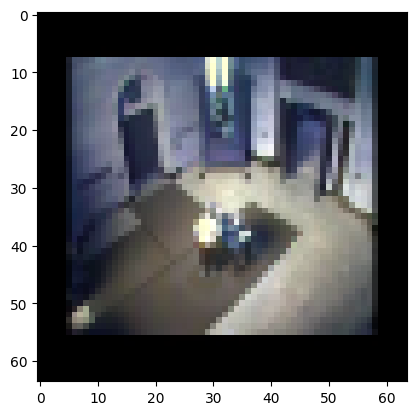

In [44]:
import cv2
import matplotlib.pyplot as plt

# 이미지가 폴더 안에 존재하는지 확인하기 위해 첫 번째 이미지만 출력
imgg = cv2.imread(slow_samples[0][0])
plt.figure()
plt.imshow(imgg)
# plt.title(class_name)  # 클래스 이름 표시
plt.show()


# 오류 2 : slow 브랜치랑 fast 브랜치에 각각 다른 데이터셋으로 넣어놓긴 했는데 train 코드를 그에 맞게 어떻게 수정해야 하는지 모르겠음.

In [80]:
# Combine the samples of the two datasets
combined_samples = train_dataset_slow.samples + train_dataset_fast.samples

# Create a new CustomDataset instance with the combined samples
combined_dataset = CustomDataset(combined_samples, transform=transform_train)

# Create data loader
train_data = DataLoader(combined_dataset, batch_size=batch_size,
                        shuffle=True, num_workers=num_workers)

epochs = 10

for epoch in range(epochs):
    tic = time.time()
    train_metric.reset()
    train_loss = 0

    # Loop through each batch of training data
    for i, batch in enumerate(train_data):
        # Extract data and label
        data = gluon.utils.split_and_load(batch[0], ctx_list=ctx, batch_axis=0)
        label = gluon.utils.split_and_load(batch[1], ctx_list=ctx, batch_axis=0)


        # AutoGrad
        with ag.record():
            output = []
            for _, X in enumerate(data):
                X = X.reshape((-1,) + X.shape[2:])
                pred = net(X)
                output.append(pred)
            loss = [loss_fn(yhat, y) for yhat, y in zip(output, label)]

        # Backpropagation
        for l in loss:
            l.backward()

        # Optimize
        trainer.step(batch_size)

        # Update metrics
        train_loss += sum([l.mean().asscalar() for l in loss])
        train_metric.update(label, output)

        if i == 10:
            break

    name, acc = train_metric.get()

    # Update history and print metrics
    train_history.update([acc])
    print('[Epoch %d] train=%f loss=%f time: %f' %
        (epoch, acc, train_loss / (i+1), time.time()-tic))

# We can plot the metric scores with:
train_history.plot()



MXNetError: ignored

In [81]:
epochs = 10

# Training loop
for epoch in range(epochs):
    # tic = time.time()
    # train_metric.reset()
    # train_loss = 0
    print('hi')
    # Training process for slow branch
    # for batch in train_data_slow:
    #     data_batch, label_batch = batch
    #     data_batch = data_batch.as_in_context(ctx)
    #     label_batch = label_batch.as_in_context(ctx)
    #     print('hii')
    #     with mx.autograd.record():
    #         output = net(data_batch)
    #         loss_val = loss_fn(output, label_batch)
    #     print('hiii')
    #     print(loss_val)
    #     loss_val.backward()
    #     trainer.step(batch_size)
    #     train_metric.update([label_batch], [output])

    # # Training process for fast branch
    # for batch in train_data_fast:
    #     data_batch, label_batch = batch
    #     data_batch = data_batch.as_in_context(ctx)
    #     label_batch = label_batch.as_in_context(ctx)
    #     with mx.autograd.record():
    #         output = net(data_batch)
    #         loss_val = loss_fn(output, label_batch)
    #     loss_val.backward()
    #     trainer.step(batch_size)
    #     train_metric.update([label_batch], [output])
    # Training process for slow branch
    for data_batch, label_batch in train_data_slow:  # 배치의 데이터와 레이블을 각각 가져옴
        data_batch = data_batch.as_in_context(ctx)
        label_batch = label_batch.as_in_context(ctx)
        with mx.autograd.record():
            output = net(data_batch)
            loss_val = loss_fn(output, label_batch)
        loss_val.backward()
        trainer.step(data_batch.shape[0])  # 배치 크기만큼 업데이트
        train_metric.update([label_batch], [output])

    # Training process for fast branch
    for data_batch, label_batch in train_data_fast:  # 배치의 데이터와 레이블을 각각 가져옴
        data_batch = data_batch.as_in_context(ctx)
        label_batch = label_batch.as_in_context(ctx)
        with mx.autograd.record():
            output = net(data_batch)
            loss_val = loss_fn(output, label_batch)
        loss_val.backward()
        trainer.step(data_batch.shape[0])  # 배치 크기만큼 업데이트
        train_metric.update([label_batch], [output])


    name, acc = train_metric.get()
    logging.info('[Epoch %d] training: %s=%f' % (epoch, name, acc))
    train_history.update([acc])
    print(acc)

hi


TypeError: ignored

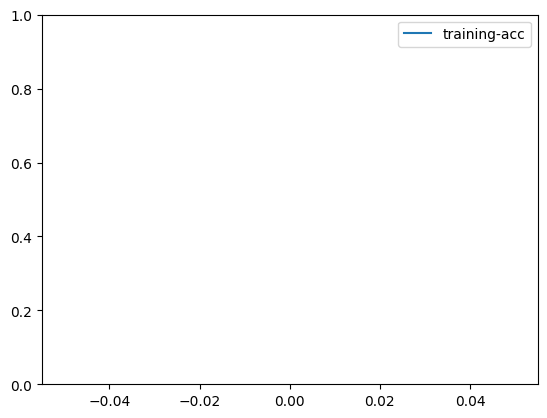

In [24]:
train_history.plot()

In [ ]:
lr_decay = 0.1
warmup_epoch = 34
total_epoch = 196
num_batches = len(train_data)
lr_scheduler = LRSequential([
    LRScheduler('linear', base_lr=0.01, target_lr=0.1,
                nepochs=warmup_epoch, iters_per_epoch=num_batches),
    LRScheduler('cosine', base_lr=0.1, target_lr=0,
                nepochs=total_epoch - warmup_epoch,
                iters_per_epoch=num_batches,
                step_factor=lr_decay, power=2)
])

# Stochastic gradient descent
optimizer = 'sgd'
# Set parameters
optimizer_params = {'learning_rate': 0.01, 'wd': 0.0001, 'momentum': 0.9}
optimizer_params['lr_scheduler'] = lr_scheduler

# Define our trainer for net
trainer = gluon.Trainer(net.collect_params(), optimizer, optimizer_params)

loss_fn = gluon.loss.SoftmaxCrossEntropyLoss()

train_metric = mx.metric.Accuracy()
train_history = TrainingHistory(['training-acc'])

epochs = 0

for epoch in range(epochs):
    tic = time.time()
    train_metric.reset()
    train_loss = 0

    # Loop through each batch of training data
    for i, batch in enumerate(train_data):
        # Extract data and label
        data = split_and_load(batch[0], ctx_list=ctx, batch_axis=0)
        label = split_and_load(batch[1], ctx_list=ctx, batch_axis=0)

        # AutoGrad
        with ag.record():
            output = []
            for _, X in enumerate(data):
                X = X.reshape((-1,) + X.shape[2:])
                pred = net(X)
                output.append(pred)
            loss = [loss_fn(yhat, y) for yhat, y in zip(output, label)]

        # Backpropagation
        for l in loss:
            l.backward()

        # Optimize
        trainer.step(batch_size)

        # Update metrics
        train_loss += sum([l.mean().asscalar() for l in loss])
        train_metric.update(label, output)

        if i == 100:
            break

    name, acc = train_metric.get()

    # Update history and print metrics
    train_history.update([acc])
    print('[Epoch %d] train=%f loss=%f time: %f' %
        (epoch, acc, train_loss / (i+1), time.time()-tic))

# We can plot the metric scores with:
train_history.plot()

In [16]:
epochs = 10

slow_ctx = mx.gpu(0)
fast_ctx = mx.gpu(0)

for epoch in range(epochs):
    tic = time.time()
    train_metric.reset()
    train_loss = 0

    # Loop through each batch of training data
    # Loop through each batch of training data for both slow and fast branches
# Loop through each batch of training data for both slow and fast branches
    for i, (slow_batch, fast_batch) in enumerate(zip(train_data_slow, train_data_fast)):
        slow_data, slow_label = slow_batch
        fast_data, fast_label = fast_batch

        # Move data and labels to respective contexts
        slow_data = slow_data.as_in_context(slow_ctx)
        slow_label = slow_label.as_in_context(slow_ctx)

        fast_data = fast_data.as_in_context(fast_ctx)
        fast_label = fast_label.as_in_context(fast_ctx)

        # Forward pass through slow branch
        with mx.autograd.record():
            slow_output = net(slow_data.transpose((0, 3, 1, 2)))  # 첫 번째 배치를 모델에 전달
            slow_loss = loss_fn(slow_output, slow_label)
        slow_loss.backward()

        # Forward pass through fast branch
        with mx.autograd.record():
            fast_output = net(fast_data)
            fast_loss = loss_fn(fast_output, fast_label)
        fast_loss.backward()

        # Update parameters
        trainer.step(batch_size)

        # Calculate metrics and update history
        train_loss += (slow_loss.mean().asscalar() + fast_loss.mean().asscalar()) / 2  # Calculate average loss
        train_metric.update([slow_label, fast_label], [slow_output, fast_output])

        if i == 100:
            break



    name, acc = train_metric.get()

    # Update history and print metrics
    train_history.update([acc])
    print('[Epoch %d] train=%f loss=%f time: %f' %
        (epoch, acc, train_loss / (i+1), time.time()-tic))

# We can plot the metric scores with:
train_history.plot()


MXNetError: ignored

In [12]:
print(slow_data.shape)

(5, 224, 3, 224)
